# Lab 2

In [25]:
# dependencies
import numpy as np;
import matplotlib.pyplot as plt;

## Euclidian Distance
the euclidian distance $$r_{2}(\textbf{u},\textbf{v})$$ between two 2-dimensional vectors $$u = (u_{1},u_{2})$$ and $$v = (v_{1},v_{2})$$ is given by the following expression:
$$r_{2}(u,v) = \sqrt{(u_{1}-v_{1})^{2} + (u_{2}-v_{2})^{2}} = \sqrt{\sum_{i=1}^{2}(u_{i}-v_{i})^{2}}$$

In [26]:
# computes the 1 x M vector of square distances for M x N and 1 x N data U,v respectively.
def sq_dist(U,v):
    # element wise difference, produces (M,N) shape array
    x = (U-v)
    return np.sum((x**2),axis=1)[None,:] # sum over the rows, and keep the outside dimension

In [27]:
# let's define some vectors

v = np.array([[2,3,5,7,8]])
u = np.array([[2,5,7,8,8]])


print(sq_dist(u,v))
print(np.sqrt(sq_dist(u,v)))

[[9]]
[[3.]]


In [28]:
# compute the euclidian distance between a row vector 1 x N and an M x N matrix
A = np.array([[1,4,3,3,2],
              [3,2,1,2,2],
              [1,3,2,2,2],
              [1,4,5,6,7]])

sq_distances = sq_dist(A,v)

print(sq_distances)
print(np.sqrt(sq_distances))

[[58 79 71  4]]
[[7.61577311 8.88819442 8.42614977 2.        ]]


In [29]:
def for_sq_dist(U,v):
    (M,N) = U.shape
    x = np.zeros((1,M))
    for i in range(M):
        x[0][i] = np.sum((U[i] - v[0])**2,axis=0)
    return x

In [30]:
print(np.sqrt(sq_dist(A,v)))
%timeit np.sqrt(sq_dist(A,v))
print( np.sqrt(for_sq_dist(A,v)))
%timeit np.sqrt(for_sq_dist(A,v))
                

[[7.61577311 8.88819442 8.42614977 2.        ]]
9.52 µs ± 133 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
[[7.61577311 8.88819442 8.42614977 2.        ]]
31.4 µs ± 943 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


## Movie Recomendation System


In [31]:
# the rows are critics, the columns are movies
data = np.loadtxt("data.txt",dtype='float',delimiter='\t')
print(data)

[[ 3.  7.  4.  9.  9.  7.]
 [ 7.  5.  5.  3.  8.  8.]
 [ 7.  5.  5.  0.  8.  4.]
 [ 5.  6.  8.  5.  9.  8.]
 [ 5.  8.  8.  8. 10.  9.]
 [ 7.  7.  8.  4.  7.  8.]]


In [32]:
# rankings of critic 3 for all movies
print(data[2,:])

[7. 5. 5. 0. 8. 4.]


In [33]:
%run Plotting.ipynb

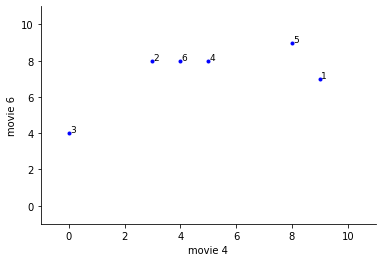

In [34]:
#plot of 2d review space for movies 2 and 3, where each point is a reviewer

X = data[:,3] # movie 4
Y = data[:,5] # movie 6
Labels = [str(x+1) for x in range(X.size)]
scatter_labelled(X,Y,Labels,"movie 4","movie 6",-1,11,-1,11)


## 3.1 Compute Euclidian distance between all critics

In [35]:
# given two matrices M X D, with the same D, calculates the euclidian distance between each row vector in A and each vector in B
# the distance between row i in A and j in B, will be in the returned matrix C at position i,j
def euclid_dist(A,B):
    # Get matrix size
    (M,N) = A.shape
    
    # define square matrix to hold distances between critics (rows)
    critic_dist = np.zeros((M,M))

    for i in range(M):
        critic_dist[i] = np.sqrt(sq_dist(A,B[i]))
    return critic_dist

print(euclid_dist(data,data))

[[ 0.          7.68114575 10.58300524  6.164414    5.19615242  7.87400787]
 [ 7.68114575  0.          5.          4.35889894  7.21110255  3.87298335]
 [10.58300524  5.          0.          7.48331477 10.72380529  6.78232998]
 [ 6.164414    4.35889894  7.48331477  0.          3.87298335  3.16227766]
 [ 5.19615242  7.21110255 10.72380529  3.87298335  0.          5.56776436]
 [ 7.87400787  3.87298335  6.78232998  3.16227766  5.56776436  0.        ]]


In [36]:
# we can also use vectorisation, and do some sneakery to do this ultra fast
# (x-y)^2= -2xy + x^2 + y^2 

A = data
B = data

# given two matrices M X D, with the same D, calculates the euclidian distance between each row vector in A and each vector in B
# the distance between row i in A and j in B, will be in the returned matrix C, D X D at position i,j
def euclid_dist_vector(X, Y):
    dists = -2 * np.dot(X, Y.T) + np.sum(Y**2,    axis=1) + np.sum(X**2, axis=1)[:, np.newaxis]
    return np.sqrt(dists)

print(euclid_dist_vector(data,data))

[[ 0.          7.68114575 10.58300524  6.164414    5.19615242  7.87400787]
 [ 7.68114575  0.          5.          4.35889894  7.21110255  3.87298335]
 [10.58300524  5.          0.          7.48331477 10.72380529  6.78232998]
 [ 6.164414    4.35889894  7.48331477  0.          3.87298335  3.16227766]
 [ 5.19615242  7.21110255 10.72380529  3.87298335  0.          5.56776436]
 [ 7.87400787  3.87298335  6.78232998  3.16227766  5.56776436  0.        ]]


In [37]:
#compare the speed
testData = np.random.rand(20000,30) # 500 vectors with 10 columns
testData2 = np.random.rand(20000,30) # 200000 vectors with 10 columns

%timeit euclid_dist(testData,testData2)

print(euclid_dist(testData,testData2))

%timeit euclid_dist_vector(testData,testData2)
print(euclid_dist_vector(testData,testData2))

2min 12s ± 3.19 s per loop (mean ± std. dev. of 7 runs, 1 loop each)
[[2.59169568 2.52302029 2.68466712 ... 2.38981574 2.39483645 2.26718905]
 [2.52298837 1.8469092  2.10286183 ... 2.17594276 2.04962691 1.71073959]
 [2.45433797 2.10671278 2.155773   ... 2.07594521 2.46599821 2.21820816]
 ...
 [2.21480363 2.09041525 2.20721165 ... 2.49594373 1.87788009 1.91883345]
 [2.33991039 1.86830425 1.95135958 ... 1.99500112 2.29573419 2.17674878]
 [2.03631785 2.45196339 2.30283628 ... 2.3378839  2.02619014 2.49937552]]
8 s ± 65.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
[[2.59169568 2.52298837 2.45433797 ... 2.21480363 2.33991039 2.03631785]
 [2.52302029 1.8469092  2.10671278 ... 2.09041525 1.86830425 2.45196339]
 [2.68466712 2.10286183 2.155773   ... 2.20721165 1.95135958 2.30283628]
 ...
 [2.38981574 2.17594276 2.07594521 ... 2.49594373 1.99500112 2.3378839 ]
 [2.39483645 2.04962691 2.46599821 ... 1.87788009 2.29573419 2.02619014]
 [2.26718905 1.71073959 2.21820816 ... 1.91883345 2.

## 3.2 User Ratings

In [38]:
#get some user data, indexing starts at 1, so convert from DUMB FUCK MATLAB to NUMPY< YEEE
u1_scores = np.array([[2,7]])
u1_movies = np.array([4,6]) - 1

u2_scores = np.array([[6,9,6]])
u2_movies = np.array([2,3,6]) -1 

#find the closest critic to each user by distance to critics on the vectors with only the movies the users have seen

#we use only the columns from data in
u1_critic_dist = euclid_dist_vector(u1_scores,data[:,u1_movies])
u2_critic_dist = euclid_dist_vector(u2_scores,data[:,u2_movies])

#we find the smallest distance and remember the index, which is the critic index which is the clostest to the given user
u1_closest_critic = np.argmin(u1_critic_dist)
u2_closest_critic = np.argmin(u2_critic_dist)

# dispaly the critic number with 1-based indexing
print(u1_closest_critic + 1)
print(u2_closest_critic + 1)

2
4


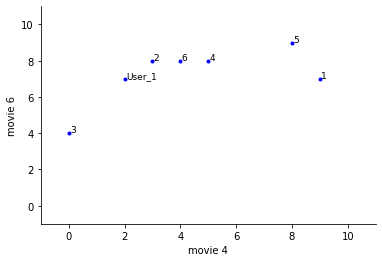

In [39]:
# let's plot the 2-dimensional review space of the critics and user1 of the movies 4 and 6
reviewSpace = np.append(data[:,u1_movies],u1_scores,axis=0)
X = reviewSpace[:,0] # movie 4
Y = reviewSpace[:,1] # movie 6

Labels = [str(x + 1) for x in range(X.size)]
Labels[X.size - 1] = "User_1"

scatter_labelled(X,Y,Labels,"movie 4","movie 6",-1,11,-1,11)

## Similarity Measure

In [40]:
def similarity_measure(u,v):
    return 1/(1 + euclid_dist_vector(u,v))
def similarity(distance):
    return 1/(1 + distance)

In [41]:
print(similarity(u2_critic_dist))

[[0.16139048 0.17912878 0.17912878 0.30901699 0.21089672 0.28989795]]
